# Decision Tree Classifier with Iris dataset

This is to train and test Decision Tree model using Iris dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

There are 4 feature values in Iris dataset, which are
 - sepal length, sepal width, petal length, and petal width

The target value has 3 classes, which are
 - 'iris setosa', 'iris versicolor', and 'iris verginica'

In [3]:
## set the feature data as X, and target data as y
X = iris.data
y = iris.target

In [4]:
## split the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=1)

## Train a Decision Tree Model

Since we already know that the target has 3 classes, I'll set max_depth=2, so that the tree will have 3 nodes (root node - at depth 0, 1st and the 2nd - at depth 1). If it is not regularized by max_depth hyperparameter, the model will most likely overfit the dataset.

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=1)

In [7]:
## fit the train set to the single Decision Tree model
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

[Text(223.2, 271.8, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(111.6, 163.08, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(334.79999999999995, 163.08, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(223.2, 54.360000000000014, 'gini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(446.4, 54.360000000000014, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]')]

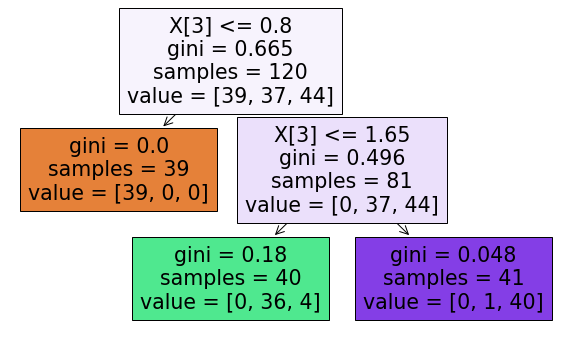

In [8]:
## Visualize the tree
from sklearn import tree
plt.figure(figsize=(10,6))
tree.plot_tree(tree_clf, filled=True)

As you see the figure, the model uses X[3] petal width attribute as a classifier. At the root node, with a condition of petal width <= 0.8, it classifies 39 samples as the first group. The group is represented as value=[39,0,0], which means that all 39 samples belong to the first target class, 'iris setosa', making it "pure"(gini=0).

At the child node, it uses a condition of petal width <= 1.65, to classify the remaining 81 samples into two groups. The left are the samples having 0.8 < petal width <= 1.65, and their classes are mostly the second target class 'iris versicolor'(n=36), with a few 'iris verginica'(n=4).

The last group contains samples with petal width > 1.65, and their target labels were mostly 'iris verginica'(n=40), with one 'iris versicolor'.

### CART(Classification and Regression Tree)
Scikit-Learn uses CART algorithm to train Decision Trees, which is why the above model used only one attribute of X[3], petal width to split the nodes. It chooses a pair of (single feature k, a threshold t_k) that produces the purest subsets from the root node. And it keeps using the same logic for the rest of the splits up until it reaches the maximum depth, so it is a greedy algorithm. 

## Make a prediction with the trained Decision Tree model

In [9]:
## make a prediction with single DecisionTree and testset
preds = tree_clf.predict(X_test)

In [10]:
## test the model's accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, preds)

print('Accuracy of Single Decision Tree: ', acc_score)

Accuracy of Single Decision Tree:  0.9666666666666667
